NumPy is the fundamental package for scientific computing with Python. It contains among other things:

  * a powerful N-dimensional array object <== today's subject
  * sophisticated (broadcasting) functions <== today's subject
  * tools for integrating C/C++ and Fortran code <== not treated 
  * random number <== today's subject
  * linear algebra, Fourier transform, etc. <== later in the course 

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined and this allows NumPy to seamlessly and speedily integrate with a wide variety of projects



In [1]:
import numpy as np # importing convention

# Arrays

A numpy array is a grid of values, **all of the same type**, and is indexed by a tuple of nonnegative integers

With respect to standard python lists, Numpy provides:
* extension package to Python for multi-dimensional arrays
* closer to hardware (efficiency)
* designed for scientific computation (convenience)
* Also known as array oriented computing


All standard data types are available:

In [2]:
# type can be set
a=np.array([1, 2, 3],'float64')
print (a,a.dtype,'\n')
a=np.array([1, 2, 3],'uint32')
print (a,a.dtype,'\n')

# or inferred: 

# complex
a=np.array([1+2j, 3+4j, 5+6*1j])
print (a,a.dtype,'\n')

# bool
a = np.array([True, False, False, True])
print (a,a.dtype,'\n')

# string
a=np.array(['bonjour messieurs dames', 'Hello', 'Hallo'])
print (a,a.dtype,'\n')


[1. 2. 3.] float64 

[1 2 3] uint32 

[1.+2.j 3.+4.j 5.+6.j] complex128 

[ True False False  True] bool 

['bonjour messieurs dames' 'Hello' 'Hallo'] <U23 



Arrays are memory-efficient container that provides fast numerical operations

In [3]:
# standard python
L = range(1000)
%timeit [i**2 for i in L]

# numpy
a = np.arange(1000)
%timeit a**2


770 µs ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.38 µs ± 321 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Dimensions

The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

1D containers

In [4]:
a1 = np.array([0, 1, 2, 3])
print (a1)
print ("array dimensions (rank):", a1.ndim)
print ("shape of the array:", a1.shape)
print ("size of the first dimension (axis):", len(a1))

[0 1 2 3]
array dimensions (rank): 1
shape of the array: (4,)
size of the first dimension (axis): 4


2D, 3D and so on

In [5]:
a2_3 = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array (dim x raws x columns)
print ("2 x 3 array:") 
print (a2_3)
print ("array dimensions (rank):", a2_3.ndim)
print ("shape of the array:", a2_3.shape)
print ("size of the first dimension (axis):", len(a2_3))

print ("")

a3_2_2 = np.array([[[1,10], [2,20], [3,30]], [[4,40], [5,50], [6,60]]])# 2 x 3 x 2 array (dim x raws x columns)
print ("2 x 3 x 2 array:")
print (a3_2_2)
print ("array dimensions (rank):", a3_2_2.ndim)
print ("shape of the array:", a3_2_2.shape)
print ("size of the first dimension (axis):", len(a3_2_2))


2 x 3 array:
[[0 1 2]
 [3 4 5]]
array dimensions (rank): 2
shape of the array: (2, 3)
size of the first dimension (axis): 2

2 x 3 x 2 array:
[[[ 1 10]
  [ 2 20]
  [ 3 30]]

 [[ 4 40]
  [ 5 50]
  [ 6 60]]]
array dimensions (rank): 3
shape of the array: (2, 3, 2)
size of the first dimension (axis): 2


### Generating arrays

back an forth from a list (i.e. a numpy array is NOT a list):

In [7]:
l = [0, 1, 2, 3] ##ARRAYS ARE NOT LIST
a = np.array(l)
print (a.tolist(), type(a.tolist()))

[0, 1, 2, 3] <class 'list'>


Copies and views:

In [9]:
a=np.array([1,2,3])
b=a # a view, POINTER, SE MODIFICO UNO MODIFICO ANCHE L'ALTRO
c=a.copy() # a copy
a[0]=7
print (a,b,c)

[7 2 3] [7 2 3] [1 2 3]


In [10]:
# evenly spaced:
print (np.arange(1,9,2)) # same as "range": start, end (exclusive), step

# or by number of points:
print (np.linspace(0, 1, 20)) # start, end, num-points (to be used for plotting f(x))


[1 3 5 7]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [11]:
# 3x3 matrix of 1's
ones = np.ones((3, 3))
print (ones,'\n')

# 2x2 matrix of 0's
zeros = np.zeros((2, 2))
print (zeros,'\n')

# 3x3 unitary matrix
unity3d = np.eye(3)
print (unity3d,'\n')

# generic diagonal matrix
diagonal = np.diag(np.array([1, 20, 3, 4]))
print (diagonal,'\n')

# from lists
array = np.array([(i,j) for i in range(2) for j in range(3)])
print (array,'\n')

# from a function
fromfunct = np.fromfunction(lambda i, j: (i-2)**2+(j-i)**2, (5,5))
print (fromfunct,'\n')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0.]
 [0. 0.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[ 1  0  0  0]
 [ 0 20  0  0]
 [ 0  0  3  0]
 [ 0  0  0  4]] 

[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]] 

[[ 4.  5.  8. 13. 20.]
 [ 2.  1.  2.  5. 10.]
 [ 4.  1.  0.  1.  4.]
 [10.  5.  2.  1.  2.]
 [20. 13.  8.  5.  4.]] 



In [12]:
## more on random later!

# Setting the random seed
np.random.seed(1235)        

# filling an array with random numers
uniform = np.random.rand(4) # 4 random numbers in [0,1]
print (uniform,'\n')

gaussian = np.random.randn(5) # 5 random numbers drawn from a gaussian with mean=0 and sigma=1
print (gaussian,'\n')

[0.95376258 0.99212647 0.47960292 0.94340686] 

[ 0.66805361  0.48883782 -0.67978825 -1.30747938  1.47030437] 



## Reshaping

In [15]:
a=np.arange(0,6)
m=a.reshape(3,2) 
print ("original=", a,'\n')
print ("3x2 matrix:",'\n', m,'\n')
# is m a view or a copy??
a[1]=10
print(m)
a_from_m = m.flatten()
print ("flattening it out (back to original)=", a_from_m,'\n')

original= [0 1 2 3 4 5] 

3x2 matrix: 
 [[0 1]
 [2 3]
 [4 5]] 

[[ 0 10]
 [ 2  3]
 [ 4  5]]
flattening it out (back to original)= [ 0 10  2  3  4  5] 



In [16]:
# 1D concatenation
a = np.array([1,2])
b = np.array([3,4,5,6])
c = np.array([7,8,9])
print ("1D concatenation:", np.concatenate((a, b, c)),'\n')

# nD concatenation
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7,8]])
# if no axis is defined, concatenations occurs on the 1st dimension
print ("default 2D concatenation:",'\n', np.concatenate((a,b)),'\n')

print ("concatenation along the first axis:",'\n',np.concatenate((a,b), axis=0),'\n')
print ("concatenation along the second axis:",'\n',np.concatenate((a,b), axis=1),'\n')

# adding a dimension, useful for linear algebra
a = np.array([1,2,3])
print (a[:,np.newaxis])
print (a[np.newaxis,:])



1D concatenation: [1 2 3 4 5 6 7 8 9] 

default 2D concatenation: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 

concatenation along the first axis: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 

concatenation along the second axis: 
 [[1 2 5 6]
 [3 4 7 8]] 

[[1]
 [2]
 [3]]
[[1 2 3]]


## Indexing and slicing

The items of an array can be accessed and assigned to the same way as other Python sequences (e.g. lists):

In [23]:
a = np.arange(10)
print (a[0], a[2], a[-1])

# reminder: the [start:stop:step] works as well. 
# step can be negative and a reverse sequence is thus obtained
print (a[2:9:3])

print (a[::-1])


0 2 9
[2 5 8]
[6 7 8]
[9 8 7 6 5 4 3 2 1 0]


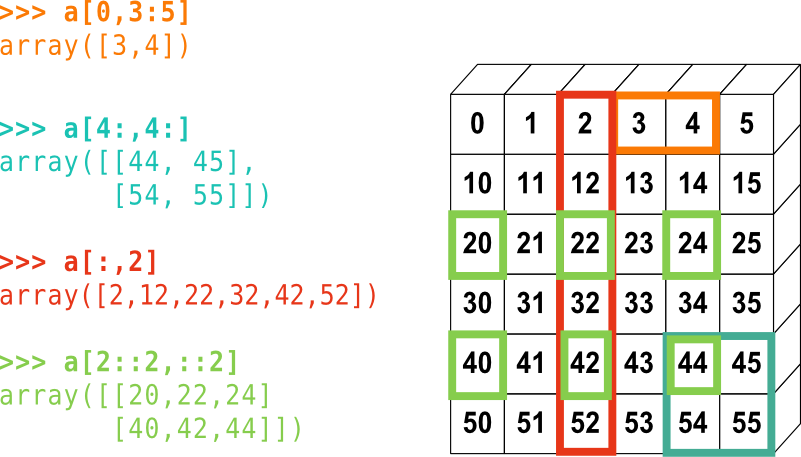

In [9]:
from IPython.display import Image
Image(filename= 'numpy_indexing.png')

For multidimensional arrays, indexes are tuples of integers.

Note:
* in 2D, the first dimension corresponds to rows, the second to columns.
* for multidimensional a, a[0] is interpreted by taking all elements in the unspecified dimensions.

A slicing operation creates a view on the original array, which is just a way of accessing array data. Thus the original array is not copied in memory. You can use `np.may_share_memory()` to check if two arrays share the same memory block. Note however, that this uses heuristics and may give you false positives.

When modifying the view, the original array is modified as well, watch out!

In [26]:
a = np.diag(np.arange(3))
print (a,'\n')
print (a[1,1],'\n')
print (a[2],'\n')

# assignment
a[2, 1] = 10 # third line, second column
print (a,'\n')

[[0 0 0]
 [0 1 0]
 [0 0 2]] 

1 

[0 0 2] 

[[ 0  0  0]
 [ 0  1  0]
 [ 0 10  2]] 



## Fancy indexing

NumPy arrays can be indexed with slices, but also with boolean or integer arrays (masks). This method is called fancy indexing. It creates copies not views.

In [27]:
a = np.random.randint(0, 21, 15)
print ("original array:", a,'\n')

mask = (a % 3 == 0)
print ("the mask:", mask,'\n')

filtered_a = a[mask]
# equivalent to a[a%3==0]
print ("the filtered array:", filtered_a,'\n')

# Indexing with a mask can be very useful to assign a new value to a sub-array:
a[a % 3 == 0] = -1
print ("the modified array:", a,'\n')

original array: [15 11 14  5 12  5  0  7 18  5  5 19 16  3 10] 

the mask: [ True False False False  True False  True False  True False False False
 False  True False] 

the filtered array: [15 12  0 18  3] 

the modified array: [-1 11 14  5 -1  5 -1  7 -1  5  5 19 16 -1 10] 



Indexing can be done with an array of integers, where the same index can be repeated several times. Note the notation!

In [ ]:
a = np.arange(0, 100, 10)
l = [2, 3, 2, 4, 2] #a python list  
print ("selection of indexes: ",a[l],'\n')  # note: [2, 3, 2, 4, 2] is a Python list


When a new array is created by indexing with an array of integers, the new array has the same shape as the array of integers:

In [ ]:
a=np.arange(0,20,2)
idx = np.array([[3,4],[9,7]]) # note the shape and the ordering
print (a[idx])

In [28]:
# an exstensive example
from IPython.display import Image
Image("numpy_fancy_indexing.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

## Universal functions

usual functions are available.
In the following the first hints on visualization with `matplotlib`

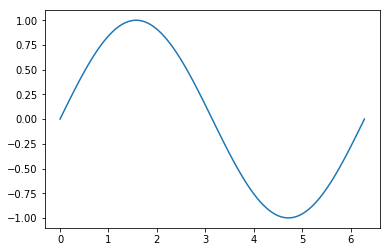

In [31]:
import matplotlib.pyplot as plt # everybody imports it that way

%matplotlib inline 
# tell jupyter to plot inline

xs = np.linspace(0, 2*np.pi, 100)
ys = np.sin(xs) # np.sin is a universal function
plt.plot(xs, ys);


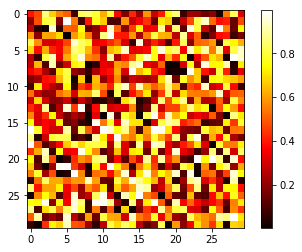

In [30]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

## Elementwise operations

### Basic operations

In [32]:
# operations with scalars
a=np.arange(4)
print (a+5,'\n')
print (2**a,'\n')

[5 6 7 8] 

[1 2 4 8] 



In [34]:
# operations among 1D "vectors". All is elementwise
a=np.arange(4)
b = np.ones(4) + 1
print(a)
print(b)
print ("a-b:", a-b)
print ("a*b:", a*b)

# all is much faster than in plain python
%timeit np.arange(10000) + 1
%timeit [i+1 for i in range(10000)] 

[0 1 2 3]
[2. 2. 2. 2.]
a-b: [-2. -1.  0.  1.]
a*b: [0. 2. 4. 6.]
27.2 µs ± 846 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.21 ms ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Array multiplication is not matrix multiplication!!

In [36]:
ones = np.ones((3,3))
print ('the original matrix:','\n',ones,'\n')

print ('the "*" product: ','\n',ones*ones,'\n') #elementwise

print ('the actual matrix product: ','\n',ones.dot(ones),'\n')

the original matrix: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

the "*" product:  
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

the actual matrix product:  
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]] 



### Other operations

comparisons, logical, functions 

In [37]:
# elementwise
print ('equal?:',np.array([1,3,2,5])==np.array([3,1,2,1]))
print ('greater than?:',np.array([1,3,2,5])>np.array([3,1,2,1]))

# array-wise
np.array_equal(np.array([1,3,2,5]),np.array([3,1,2,1]))

equal?: [False False  True False]
greater than?: [False  True False  True]


False

In [38]:
# logical
a=np.array([1,1,0,0],bool)
b=np.array([1,0,1,0],bool)
print ("logical or:", np.logical_or(a,b))
print ("logical and:", np.logical_and(a,b))

logical or: [ True  True  True False]
logical and: [ True False False False]


In [39]:
# functions
a=np.arange(8)
print ("sin:", np.sin(a))
print ("log:", np.log(a))

# works in whatever dimension
m=a.reshape(2,4)
print (m)
print ("exp:", np.exp(m))

sin: [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866 ]
log: [      -inf 0.         0.69314718 1.09861229 1.38629436 1.60943791
 1.79175947 1.94591015]
[[0 1 2 3]
 [4 5 6 7]]
exp: [[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01]
 [5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03]]


C:\Users\saret\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [40]:
# extracting off-diagonal terms
a= np.tril(np.arange(16).reshape(4,4), -1) # play with the last parameter!
#a= np.triu(np.arange(16).reshape(4,4), 1) # play with the last parameter (sign and value)!
print ("a:", '\n', a , '\n')

print ("transpose:", '\n', a.T , '\n') #a.T is a view!

a: 
 [[ 0  0  0  0]
 [ 4  0  0  0]
 [ 8  9  0  0]
 [12 13 14  0]] 

transpose: 
 [[ 0  4  8 12]
 [ 0  0  9 13]
 [ 0  0  0 14]
 [ 0  0  0  0]] 



N.B.: a linear algebra package exists in numpy, `numpy.linalg`, but performance-wise the scipy one, `scipy.linalg`, is way better, we will see that later

## Reductions

Operations on the elements of an array returning a (set of) scalar are available either as methods of the array class or as numpy functions.

In dimensions higher than one, the axis have to be specified

In [42]:
a=np.arange(1,7)
# just to mess it up (for random see later)
np.random.shuffle(a)
print (a)
print ("sum:", a.sum(), np.sum(a))
print ("min:", a.min(), np.min(a))
print ("max:", a.max(), np.max(a))
print ("index of the minimum argument:", a.argmin(), np.argmin(a))
print ("index of the maximum argument:", a.argmax(), np.argmax(a))
print ("mean:", a.mean(), np.mean(a))
print ("median:", np.median(a)) # so weird, median is not a method of the array class..
print ("standard deviation:", a.std(), np.std(a))
# and many others


# giving you a "chicca" here:
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(a)) #se faccio la stessa roba più volte sicuramente c'è un modo più intelligente di farlo



[4 3 2 5 6 1]
sum: 21 21
min: 1 1
max: 6 6
index of the minimum argument: 5 5
index of the maximum argument: 4 4
mean: 3.5 3.5
median: 3.5
standard deviation: 1.707825127659933 1.707825127659933
sum 21
min 1
argmin 5
mean 3.5
median 3.5
std 1.707825127659933


In [43]:
# all those things wors as well in higher dimensions

m=a.reshape(3,2)
print (m,'\n')

print ("sum along the columns:", m.sum(axis=0))
print ("sum along the rows:", m.sum(axis=1))

[[4 3]
 [2 5]
 [6 1]] 

sum along the columns: [12  9]
sum along the rows: [7 7 7]


## Broadcasting

So far we have seen elementwise operations on arrays, which works only on arrays of the same size/shape (Verify that out!!).

Nevertheless, It’s also possible to do operations on arrays of different
sizes if NumPy can transform these arrays so that they all have
the same size: this conversion is called broadcasting.

In [44]:
from IPython.display import Image
Image("numpy_broadcasting.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

In [45]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T # check what exactly np.tile does! 
print ("original array:",'\n',a,'\n')
print ("broadcasted sum :",'\n',a+np.arange(3),'\n')

original array: 
 [[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

broadcasted sum : 
 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]] 



## More on shape manipulation

In [ ]:
# adding a dimension (useful for linear algebra)
print ("new dim along axis 1:",'\n', np.arange(1,4)[:,np.newaxis],'\n')
print ("new dim along axis 0:",'\n', np.arange(1,4)[np.newaxis,:],'\n')

# resizing
print ("resizing:",'\n', np.resize(np.arange(4),(8,)),'\n')


# Random numbers

There are two modules for (pseudo) random numbers that are commonly used. When all you need is to generate random numbers from some distribtuion, the `numpy.random` moodule is the simplest to use. When you need more information realted to a disttribution such as quantiles or the PDF, you can use the `scipy.stats` module, which will see later in the course.

In [46]:
import numpy.random as npr
npr.seed(123) # fix seed for reproducible result (per ottenere sempre gli stessi risultati)

### Random data

In [49]:
# random values from a uniform distrubtion in [0.0, 1.0) for a given shape
print ("uniform:",'\n', npr.rand(3,4),'\n') # shape=(3,4)
 
# random values from a standard normal distrubtion  for a given shape
print ("normal:",'\n', npr.randn(2,5),'\n') # shape=(2,5)

# random integers between "low" and "high" edges for a given shape (size)
print ("integers:",'\n', npr.randint(1,5,size=(3,6)),'\n') # shape=(3,6)

uniform: 
 [[0.6249035  0.67468905 0.84234244 0.08319499]
 [0.76368284 0.24366637 0.19422296 0.57245696]
 [0.09571252 0.88532683 0.62724897 0.72341636]] 

normal: 
 [[ 0.04549008 -0.23309206 -1.19830114  0.19952407  0.46843912]
 [-0.83115498  1.16220405 -1.09720305 -2.12310035  1.03972709]] 

integers: 
 [[3 4 2 3 1 2]
 [1 3 1 4 1 4]
 [4 3 1 3 2 1]] 



### Operations on arrays

In [50]:
# randomly shuffling a vector
x = np.arange(10)
npr.shuffle(x)
print ("reshuffling:",'\n', x,'\n')
# npr.permutation works similarly

# Generates a random sample from a given 1-D array (without replacement)
x = np.arange(10,20)
print ("choice w/o replace",'\n',npr.choice(x, 10, replace=False),'\n')

# Generates a random sample of a given dimension from a given 1-D array
print ("choice w/o replace",'\n',npr.choice(x, (5, 10), replace=True),'\n') # this is default




reshuffling: 
 [8 2 3 5 1 6 0 7 9 4] 

choice w/o replace 
 [14 17 13 15 12 10 19 11 16 18] 

choice w/o replace 
 [[11 17 11 17 19 18 17 11 13 11]
 [18 17 15 11 12 15 12 12 19 13]
 [12 16 17 19 11 13 18 13 17 19]
 [19 13 13 15 16 10 18 17 17 14]
 [14 15 10 18 19 12 15 11 15 19]] 



## Probability Density Functions

numbers can be drawn from basically any common PDF (normal, binomial, chisquare, etc..)

In [51]:
# exponential
print ("exponential:",'\n', npr.exponential(10, size=(3,2)),'\n')

exponential: 
 [[ 7.12185793  5.39216765]
 [ 2.95503151  4.80477662]
 [16.47058979 16.66215359]] 



In [52]:
# tossing a dice
roll = 1./6
x = npr.multinomial(20, [roll]*6, size=2)
print ("frequencies of 6-faces dice tossing (two players):",'\n', x)

frequencies of 6-faces dice tossing (two players): 
 [[4 7 2 1 3 3]
 [3 3 2 1 6 5]]


In [53]:
# toy example - estimating pi inefficiently
n = int(1e6)
x = npr.uniform(-1,1,(n,2))
4.0*np.sum(x[:,0]**2 + x[:,1]**2 < 1)/n

3.141304

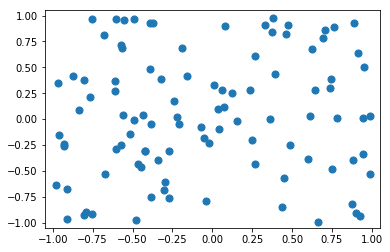

In [54]:
# uniformly distributed numbers in 2D
x = npr.uniform(-1, 1, (100, 2))
plt.scatter(x[:,0], x[:,1], s=50)
plt.axis([-1.05, 1.05, -1.05, 1.05]);